<!DOCTYPE html>
<html>

<head>
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title></title>
</head>

<body style="font-family: Dubai; color: rgb(0, 0, 0); background-color: rgb(255, 255, 255);">
    <p style="text-align: left;">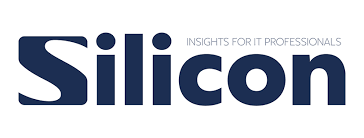</p>
    <p style="text-align: left;"><span style="text-align: inherit;"><strong><span style="font-size: 16px;"><em>In this project, I use Web scrapping and the python library BeautifulSoup to gather data about news articles from the Silicon website &nbsp;having for subject Data universe, the latest technologies and IT solutions. This Jupyter Notebook explains how to scrap data from a Website like Silicon :</em></span></strong></span></p>
    <br>
    <ul>
        <li style="text-align: left; color: rgb(71, 85, 119);"><em><span style="font-family: Calibri, sans-serif;">URL of articles&nbsp;</span></em><span style="font-family: Calibri, sans-serif;">: Article_link</span></li>
        <li style="text-align: left; color: rgb(71, 85, 119);"><span style="font-family: Calibri, sans-serif;"><em>Title of article&nbsp;</em>: Article_title</span></li>
        <li style="text-align: left; color: rgb(71, 85, 119);"><span style="font-family: Calibri, sans-serif;"><em>Category of article&nbsp;</em>: Article_date</span></li>
        <li style="text-align: left; color: rgb(71, 85, 119);"><span style="font-family: Calibri, sans-serif;"><em>Author of the article :&nbsp;</em>Article_author_name</span></li>
        <li style="text-align: left; color: rgb(71, 85, 119);"><span style="font-family: Calibri, sans-serif;"><em>Topics of articles</em> : Articles_topics</span></li>
        <li style="text-align: left; color: rgb(71, 85, 119);"><span style="font-family: Calibri, sans-serif;"><em>Source of articles</em> : Article_source</span></li>
    </ul>
    <p><br></p>
    <p><br></p>
    <p style="text-align: center;"><br></p>
</body>

</html>

## Web Scrapping
Link : https://www.silicon.fr/france-plateforme-calcul-quantique-429430.html

In [1]:
import re
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup

In [2]:
articleAuthor, articledatetime = [],[]
articleCat, articleTitle, articleLink = [],[],[]

In [3]:
# Functions
def extract(x):
    if x is not None :
        return x.text.replace('\n','')
    else:
        return np.nan
def extract_link(x):
    return x.a['href']

#### First Soup :
Here I collect the Titles, URL and Categories of articles

In [4]:
numberOfPage = 6 # Enter the number of webpage to collect data
for i in range(1,numberOfPage):
    # Url
    url = "https://www.silicon.fr/actualites/data-storage/page/"+str(i)
    source = "Silicon : "+url
    
    #Web response
    res  =  requests.get(url)
    
    if(res.status_code == 200) :
        
        print('Connected to URL page'+ url, end=" : ")    
        soup =  BeautifulSoup(res.text, 'html.parser')

        titleSoup    =  soup.find_all('h2','entry-title')
        categorySoup =  soup.find_all('div','categorie_title')
        
        n =  len(list(categorySoup))

        articleCat.extend(list(map(extract, categorySoup)))
        articleTitle.extend(list(map(extract, titleSoup))[:n])
        articleLink.extend(list(map(extract_link, titleSoup))[:n])

        print("Data correctly collected ! ")
        
    elif(res.status_code == 400) :
        print("Connection Problem error 404" )

Connected to URL pagehttps://www.silicon.fr/actualites/data-storage/page/1 : Data correctly collected ! 
Connected to URL pagehttps://www.silicon.fr/actualites/data-storage/page/2 : Data correctly collected ! 
Connected to URL pagehttps://www.silicon.fr/actualites/data-storage/page/3 : Data correctly collected ! 
Connected to URL pagehttps://www.silicon.fr/actualites/data-storage/page/4 : Data correctly collected ! 
Connected to URL pagehttps://www.silicon.fr/actualites/data-storage/page/5 : Data correctly collected ! 


In [5]:
titleSoup    =  soup.find_all('h2','entry-title')
categorySoup =  soup.find_all('div','categorie_title')

#### Second Soup 

In [6]:
for i in articleLink :
    
    res = requests.get(i)
    #print(res.status_code, '->', i)
    
    if(res.status_code != 200):
        
        articleAuthor.append(np.nan)
        articledatetime.append(np.nan)
    
    else : 
        soup = BeautifulSoup(res.text, 'html.parser') 
        
        articleAuthor.append( soup.find('span','author vcard') ) #if soup.find('span','author vcard') is not None else articleAuthor.append(np.nan)


        if(i == "https://livreblanc.silicon.fr/resource/explications-et-avantages-de-la-facture-electronique"):
            articledatetime.append(np.nan)
        
        else:
            articledatetime.append(soup.find('time')["datetime"][:10])

In [7]:
articleAuthor = list(map(extract, articleAuthor))
data = ["Data"]*len(articleLink)
source = [source]*len(articleLink)

In [8]:
col = ["Article_link", "Article_title" ,"Articile_date","Article_author_name","Article_topics","Article_main_sub_domain","Article_source"]

In [9]:
df = pd.DataFrame([articleLink,articleTitle,articledatetime, articleAuthor,data,articleCat, source] ).T
df.columns=col

In [10]:
df = df.dropna().iloc[1:]
df_50 = df[df.columns].astype(str).head(50) # Top 50 of full rows

In [11]:
df_50.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 60
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Article_link             50 non-null     object
 1   Article_title            50 non-null     object
 2   Articile_date            50 non-null     object
 3   Article_author_name      50 non-null     object
 4   Article_topics           50 non-null     object
 5   Article_main_sub_domain  50 non-null     object
 6   Article_source           50 non-null     object
dtypes: object(7)
memory usage: 3.1+ KB


In [12]:
import random as rd
id_list = rd.sample(list(range(100,999)) , k=df_50.shape[0]+11)
df_50["Id"] = pd.Series(id_list)
df_50["Id"] = df_50["Id"].astype('Int64').astype(str)


In [13]:
df_50 = df_50[['Id','Article_link', 'Article_title', 'Articile_date', 'Article_author_name','Article_topics', 'Article_main_sub_domain', 'Article_source']]
df_50

,Id,Article_link,Article_title,Articile_date,Article_author_name,Article_topics,Article_main_sub_domain,Article_source
1,508,https://www.silicon.fr/brandvoice/liebherr-aer...,Liebherr-Aerospace Toulouse réalise sa migrati...,2020-01-27,Microsoft,Data,brandvoice,Silicon : https://www.silicon.fr/actualites/da...
2,777,https://www.silicon.fr/france-plateforme-calcu...,La France lance une plateforme de calcul quant...,2022-01-04,Ariane Beky,Data,Machine Learning,Silicon : https://www.silicon.fr/actualites/da...
3,439,https://www.silicon.fr/gaia-x-livrables-422743...,GAIA-X accélère sur les livrables,2022-01-03,Clément Bohic,Data,Data & Stockage,Silicon : https://www.silicon.fr/actualites/da...
4,823,https://www.silicon.fr/dbpaas-bases-donnees-cl...,Bases de données cloud : qui sont les principa...,2021-12-21,Clément Bohic,Data,Bases de données,Silicon : https://www.silicon.fr/actualites/da...
6,506,https://www.silicon.fr/dbpaas-bases-donnees-cl...,Bases de données cloud : comment jauger le mar...,2021-12-20,Clément Bohic,Data,Bases de données,Silicon : https://www.silicon.fr/actualites/da...
7,262,https://www.silicon.fr/buglab-ia-analyse-code-...,BugLab : une autre approche de l’IA pour l’ana...,2021-12-17,Clément Bohic,Data,Deep Learning,Silicon : https://www.silicon.fr/actualites/da...
9,689,https://www.silicon.fr/dossiers/plateformes-ds...,Plateformes DSML : les Data Science à l’échell...,2021-12-13,Alain Clapaud,Data,Big Data,Silicon : https://www.silicon.fr/actualites/da...
10,367,https://www.silicon.fr/hyperconvergence-logici...,Hyperconvergence logicielle : la question du r...,2021-12-07,Clément Bohic,Data,Data & Stockage,Silicon : https://www.silicon.fr/actualites/da...
11,685,https://www.silicon.fr/ia-joker-equipes-big-da...,IA : le joker des équipes perdues dans le Big ...,2021-12-01,Ariane Beky,Data,Data & Stockage,Silicon : https://www.silicon.fr/actualites/da...
12,232,https://www.silicon.fr/hyperconvergence-logici...,Hyperconvergence logicielle : qui sont les pri...,2021-12-01,Clément Bohic,Data,Data & Stockage,Silicon : https://www.silicon.fr/actualites/da...


In [14]:
df_50.to_excel("./AIKD_project.xlsx", index=False)